<a href="https://colab.research.google.com/github/UPavankumar/Data-Analysis-Projects/blob/main/titanic_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: import dataset from #!/bin/bash
# kaggle datasets download yasserh/titanic-dataset ans save dataset in df

!pip install kaggle

!kaggle datasets download -d yasserh/titanic-dataset

!unzip titanic-dataset.zip

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming the dataset is a CSV file named 'titanic.csv'
df = pd.read_csv('Titanic-Dataset.csv')

# Now you can work with the DataFrame 'df'
print(df.info())


Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic-dataset.zip
replace Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(

In [ ]:
# prompt: replace male as 0 and female as 1

pd.set_option('future.no_silent_downcasting', True)
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].replace({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  Age_Group    714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


In [ ]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,Southampton,Young Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,Southampton,Young Adult


In [ ]:
threshold = 0.75
for col in df.columns:
    percent_filled = df[col].count() / len(df)
    print(f'{col}: {percent_filled:.2%}')
    if percent_filled < threshold:
        df.drop(col, axis=1, inplace=True)


PassengerId: 100.00%
Survived: 100.00%
Pclass: 100.00%
Name: 100.00%
Sex: 100.00%
Age: 80.13%
SibSp: 100.00%
Parch: 100.00%
Ticket: 100.00%
Fare: 100.00%
Cabin: 22.90%
Embarked: 99.78%
Age_Group: 80.13%


In [ ]:
df['fam'] = df['SibSp'] + df['Parch']+1
df['Survived_Percent'] = df['Survived'] * 100
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       891 non-null    int64   
 1   Survived          891 non-null    int64   
 2   Pclass            891 non-null    int64   
 3   Name              891 non-null    object  
 4   Sex               891 non-null    object  
 5   Age               714 non-null    float64 
 6   SibSp             891 non-null    int64   
 7   Parch             891 non-null    int64   
 8   Ticket            891 non-null    object  
 9   Fare              891 non-null    float64 
 10  Embarked          889 non-null    object  
 11  Age_Group         714 non-null    category
 12  fam               891 non-null    int64   
 13  Survived_Percent  891 non-null    int64   
dtypes: category(1), float64(2), int64(7), object(4)
memory usage: 91.7+ KB


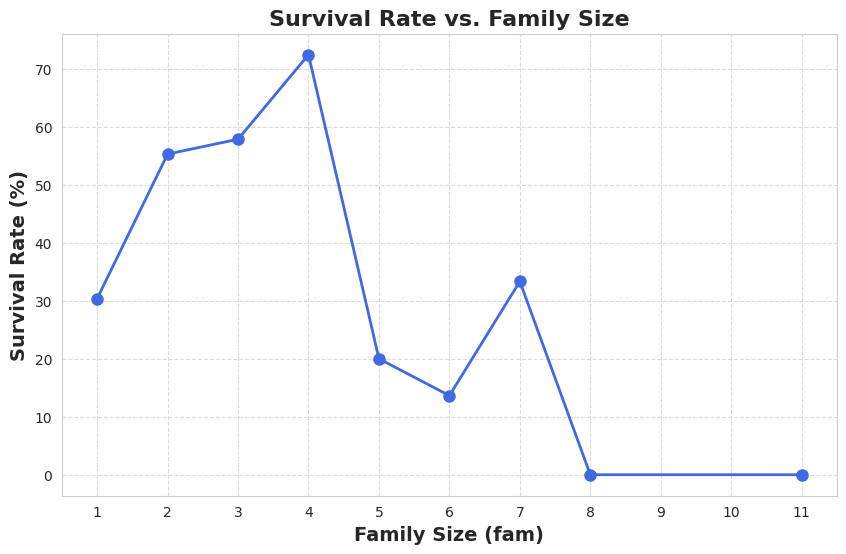

In [ ]:
# Group by 'fam' and calculate the survival rate
survival_rate = df.groupby('fam')['Survived_Percent'].mean()

# Set Seaborn style
sns.set_style("whitegrid")

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(survival_rate.index, survival_rate.values, marker='o', linestyle='-', color='royalblue', linewidth=2, markersize=8)
plt.xlabel('Family Size (fam)', fontsize=14, fontweight='bold')
plt.ylabel('Survival Rate (%)', fontsize=14, fontweight='bold')
plt.title('Survival Rate vs. Family Size', fontsize=16, fontweight='bold')
plt.xticks(ticks=range(min(survival_rate.index), max(survival_rate.index) + 1, 1)) # Grid separation of 1 on x-axis
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:


# Filter for families with more than 8 members
large_families = df[df['fam'] > 8]

# Print the results
print(f"Number of large families (more than 8 members): {len(large_families)}")
# Passenger class distribution for large families
print(large_families['Pclass'].value_counts())
print(f"Survivors in large families: {large_families['Survived'].sum()}")




Number of large families (more than 8 members): 7
Pclass
3    7
Name: count, dtype: int64
Survivors in large families: 0


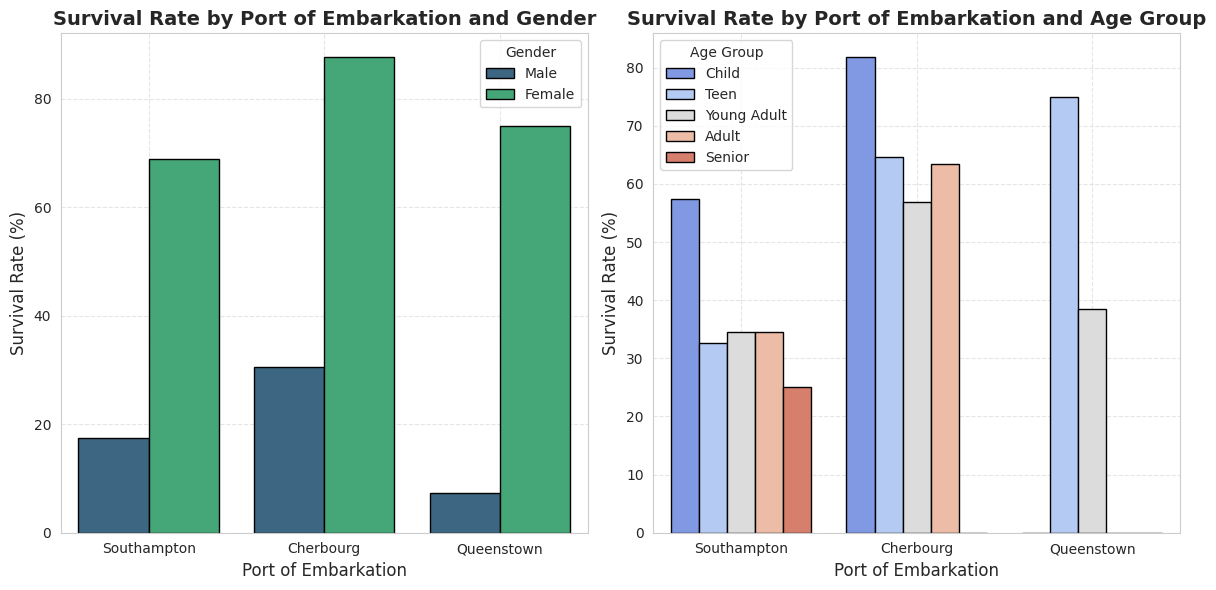

In [ ]:
plt.figure(figsize=(12, 6))

# Survival rate by port and gender
plt.subplot(1, 2, 1)
sns.barplot(x='Embarked', y='Survived_Percent', data=df, hue='Sex', palette='viridis', errorbar=None, edgecolor='black')
plt.title('Survival Rate by Port of Embarkation and Gender', fontsize=14, fontweight='bold')
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.grid(True, linestyle='--', alpha=0.5)

# Survival rate by port and age group
plt.subplot(1, 2, 2)
sns.barplot(x='Embarked', y='Survived_Percent', data=df, hue='Age_Group', palette='coolwarm', errorbar=None, edgecolor='black')
plt.title('Survival Rate by Port of Embarkation and Age Group', fontsize=14, fontweight='bold')
plt.xlabel('Port of Embarkation', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


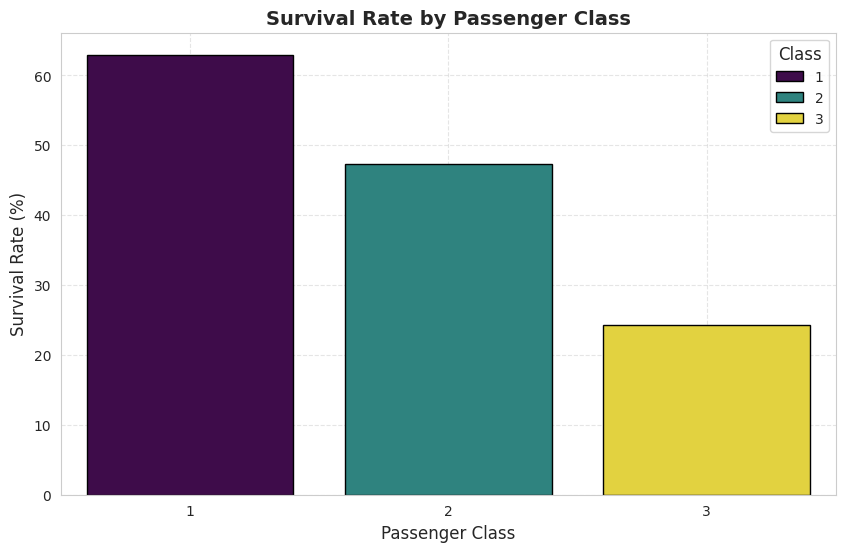

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived_Percent',errorbar=None, data=df, hue='Pclass', dodge=False, palette='viridis', edgecolor='black')
plt.title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Class', title_fontsize='12', fontsize='10')
plt.show()


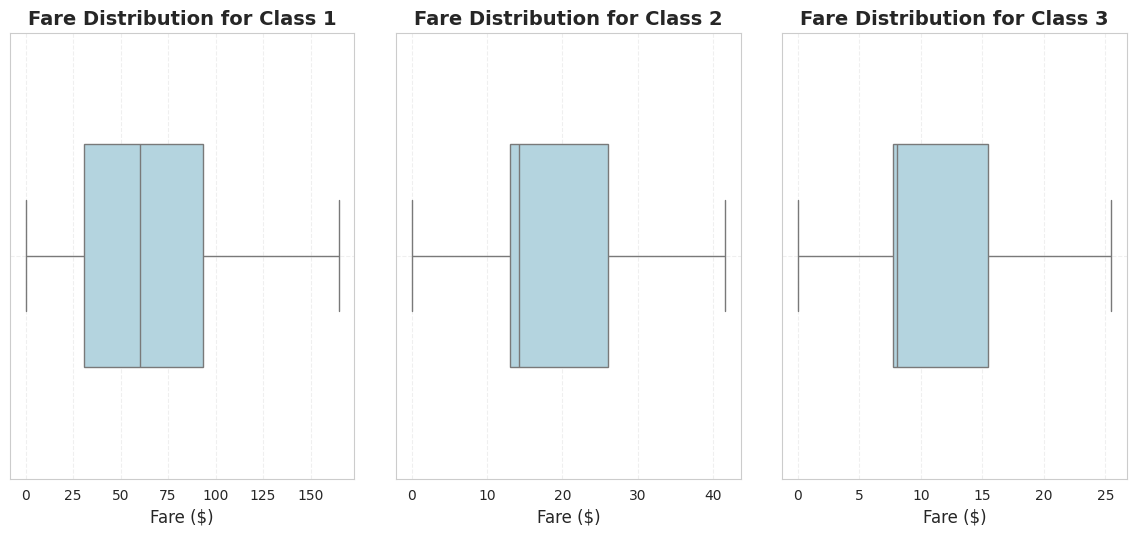

In [ ]:
plt.figure(figsize=(12, 6))

# Cleaner boxplot without outliers
for i, pclass in enumerate(sorted(df['Pclass'].unique()), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[df['Pclass'] == pclass]['Fare'], color='lightblue', width=0.5, showfliers=False)
    plt.title(f'Fare Distribution for Class {pclass}', fontsize=14, fontweight='bold')
    plt.xlabel('Fare ($)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(fontsize=10)

plt.tight_layout(pad=3)
plt.show()


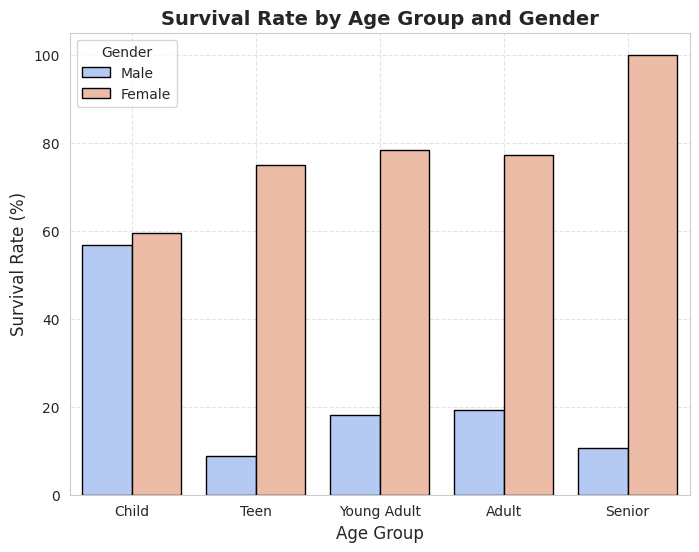

In [ ]:
# Group by 5 age groups and sex, then calculate survival rate
survival_by_age_sex = df.groupby(['Age_Group', 'Sex'], observed=True)['Survived_Percent'].mean().reset_index()

# Map sex column to readable labels
survival_by_age_sex['Sex'] = survival_by_age_sex['Sex'].map({0: 'Male', 1: 'Female'})

# Plotting survival rate by age group and sex
plt.figure(figsize=(8, 6))
sns.barplot(x='Age_Group', y='Survived_Percent', hue='Sex', data=survival_by_age_sex, palette='coolwarm', edgecolor='black')
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.title('Survival Rate by Age Group and Gender', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



Male Survival Rate: 18.89%
Female Survival Rate: 74.20%


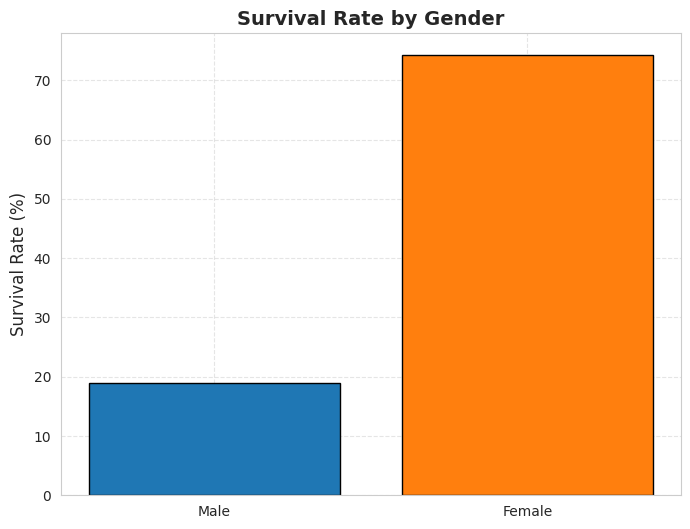

In [ ]:
male_survival_rate = df[df['Sex'] == 0]['Survived_Percent'].mean()
female_survival_rate = df[df['Sex'] == 1]['Survived_Percent'].mean()

print(f"Male Survival Rate: {male_survival_rate:.2f}%")
print(f"Female Survival Rate: {female_survival_rate:.2f}%")

# Custom colors
colors = ['#1f77b4', '#ff7f0e']

# Bar plot without the warning
plt.figure(figsize=(8, 6))
plt.bar(x=['Male', 'Female'], height=[male_survival_rate, female_survival_rate], color=colors, edgecolor='black')
plt.ylabel('Survival Rate (%)', fontsize=12)
plt.title('Survival Rate by Gender', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# prompt: categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Age_Group', 'fam'] "give me a group which has highest and lowest survivabilty"

import matplotlib.pyplot as plt

categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Age_Group', 'fam']

for col in categorical_columns:
    survival_rates = df.groupby(col)['Survived_Percent'].mean()
    highest_survival = survival_rates.idxmax()
    lowest_survival = survival_rates.idxmin()
    print(f"For column '{col}':")
    print(f"  Highest survival rate: {highest_survival} ({survival_rates[highest_survival]:.2f}%)")
    print(f"  Lowest survival rate: {lowest_survival} ({survival_rates[lowest_survival]:.2f}%)")
    print("-" * 20)


For column 'Pclass':
  Highest survival rate: 1 (62.96%)
  Lowest survival rate: 3 (24.24%)
--------------------
For column 'Sex':
  Highest survival rate: 1 (74.20%)
  Lowest survival rate: 0 (18.89%)
--------------------
For column 'Embarked':
  Highest survival rate: Cherbourg (55.36%)
  Lowest survival rate: Southampton (33.70%)
--------------------
For column 'Age_Group':
  Highest survival rate: Child (57.97%)
  Lowest survival rate: Senior (22.73%)
--------------------
For column 'fam':
  Highest survival rate: 4 (72.41%)
  Lowest survival rate: 8 (0.00%)
--------------------


<ipython-input-28-99397629f04a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rates = df.groupby(col)['Survived_Percent'].mean()


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,fam,Survived_Percent
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Southampton,Young Adult,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,Cherbourg,Adult,2,100
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,Young Adult,1,100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,Southampton,Young Adult,2,100
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Southampton,Young Adult,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       891 non-null    int64   
 1   Survived          891 non-null    int64   
 2   Pclass            891 non-null    int64   
 3   Name              891 non-null    object  
 4   Sex               891 non-null    object  
 5   Age               714 non-null    float64 
 6   SibSp             891 non-null    int64   
 7   Parch             891 non-null    int64   
 8   Ticket            891 non-null    object  
 9   Fare              891 non-null    float64 
 10  Embarked          889 non-null    object  
 11  Age_Group         714 non-null    category
 12  fam               891 non-null    int64   
 13  Survived_Percent  891 non-null    int64   
dtypes: category(1), float64(2), int64(7), object(4)
memory usage: 91.7+ KB


In [ ]:
# Filter the DataFrame for senior female 1st class passengers from Cherbourg
senior_female_cherbourg = df[
    (df['Pclass'] == 1) &
    (df['Sex'] == 1) &
    (df['Age_Group'] == 'Senior')

]


# Calculate survival rate
survival_rate = senior_female_cherbourg['Survived_Percent'].mean()

print(f"Survival percentage of senior female 1st class passenger: {survival_rate:.2f}%")


Survival percentage of senior female 1st class passenger: 100.00%
